<h1 align='center'>EE5907_CA2  &nbsp; &nbsp;&nbsp;&nbsp;     Yang Di &nbsp; &nbsp;&nbsp;&nbsp;    A0229522H<h1>
<h2>Part 1: Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA)<h2>

<h3>1.1  Datasets preparation </h3>
<p> According to topic, the Face recognization system will base on CMU PIE dataset, which contains face photos from 68 different persons. <br> In the assignment, 25 subsets among 68 people will be randomly selected to form dataset, whichthere are 25 classes data in datasets.<br> As for each class, 70% of images are for training and the remaining 30% are used for testing. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os

In [2]:
# This block is used to process my selftaken photos. For the checking, GAs may not need to run it.
import cv2

def generate_own_image(photo_id,og_path, out_path):
    
    og_img = cv2.imread(og_path, cv2.IMREAD_UNCHANGED)
    img_reshape = cv2.resize(og_img,(32,32), interpolation = cv2.INTER_AREA)     # load image and transform it to 32*32 pixel   

    img_gray = cv2.cvtColor(img_reshape, cv2.COLOR_BGR2GRAY)     # recolour my photo as gray corresponding to CMU dataset
    
    # show results
    print("photo's id is "+str(photo_id)+':','Original Dimensions : ', og_img.shape,'Resized Dimensions : ', img_gray.shape)
    # save and close
    cv2.imwrite(out_path, img_gray) 

In [3]:
path = os.path.abspath('MINE')  # to get the path of my own photo without process. 

for i in range(1,11):
    og_path = os.path.join(path, str(i)+'.jpg')
    out_path = os.path.join(path,'OP', str(i)+'.jpg')
    generate_own_image(i,og_path, out_path)

photo's id is 1: Original Dimensions :  (2316, 2316, 3) Resized Dimensions :  (32, 32)
photo's id is 2: Original Dimensions :  (2316, 2316, 3) Resized Dimensions :  (32, 32)
photo's id is 3: Original Dimensions :  (2316, 2316, 3) Resized Dimensions :  (32, 32)
photo's id is 4: Original Dimensions :  (2316, 2316, 3) Resized Dimensions :  (32, 32)
photo's id is 5: Original Dimensions :  (2316, 2316, 3) Resized Dimensions :  (32, 32)
photo's id is 6: Original Dimensions :  (2316, 2316, 3) Resized Dimensions :  (32, 32)
photo's id is 7: Original Dimensions :  (2316, 2316, 3) Resized Dimensions :  (32, 32)
photo's id is 8: Original Dimensions :  (2316, 2316, 3) Resized Dimensions :  (32, 32)
photo's id is 9: Original Dimensions :  (2316, 2316, 3) Resized Dimensions :  (32, 32)
photo's id is 10: Original Dimensions :  (2316, 2316, 3) Resized Dimensions :  (32, 32)


In [4]:
import random

# to randomly select 25 picture sets from PIE and randomly select pictures as training set
def random_select(num, start, end, seed): 
    random.seed(seed)
    selected_id = [i for i in range(start,end)]
    random.shuffle(selected_id)
    return sorted(selected_id[0:num])

# to randonmly choose 25 PIE subjects 
selected_id = random_select(num=25, start=1, end=68,seed=90) 
print("Selected subset's id are ", selected_id)

Selected subset's id are  [1, 6, 11, 13, 14, 15, 16, 19, 21, 22, 26, 28, 31, 33, 36, 39, 42, 45, 46, 55, 56, 58, 59, 60, 61]


The number of chosen images: 4250
Image size: (32, 32)
Training set: 2975 (0.7) Test set: 1275 (0.3)

 randomly display ten photos from dataset


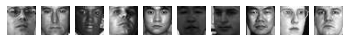

In [5]:
#to load data from chosen CMU dataset.
train_img = []
train_label = []
test_img = []
test_label = []

for file in selected_id:
    # Please replace the address of PIE here with you PIE folder's complete address
    wd = os.path.join("PIE/",str(file))    # load work address of each subset
    chosen_img = []           
    corre_label = []
    
    for img_id in os.listdir(wd):
        path = os.path.join(wd, img_id)
        img = plt.imread(path)
        chosen_img.append(img)
        corre_label.append(int(file))

# For each chosen subject,70% of the contained images are for training and the remaining 30% is for testing.        
    train_idx = random_select(num=round(len(chosen_img)*0.7),start=0, end=len(chosen_img), seed=20)
    
    for i in range(0,len(chosen_img)):
            if i in train_idx:
                train_img.append(chosen_img[i])
                train_label.append(corre_label[i])
            else:
                test_img.append(chosen_img[i])            
                test_label.append(corre_label[i])

        # right here, i choose to use probably approach to separate images, 
        #the training number and test number can be exactly equal to 2975(0.7) and 1275(0.3).
        

print("The number of chosen images:",len(train_label)+len(test_label))        
print("Image size: {}\nTraining set: {} ({}) Test set: {} ({})".format(train_img[0].shape, len(train_label),
                                                                       len(train_label)/(len(train_label)+len(test_label)), len(test_label),
                                                                       len(test_label)/(len(train_label)+len(test_label))))
fig, axs= plt.subplots(1, 10) 

for i in range(10):          
    img = random.choice(train_img)         
    axs[i].imshow(img, cmap='gray')              
    axs[i].axis('off') #to hide axis 

print('\n randomly display ten photos from dataset')  
plt.show()

<p> 10 selfies or the author himself are resized and added into the dataset as shown below. Similarly, 7 for training and 3 for testing.</p>

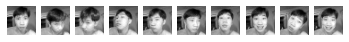

In [6]:
#To load my selftaken photo set
my_img= []
my_label = []
for i in os.listdir("MINE/OP/"):
    img = plt.imread("MINE/OP/"+i)
    my_img.append(img)
    my_label.append('myphoto')

# right here, I just mannually seperate my photos into 2 part, due to the number of photos is small.    
my_train_img = my_img[0:7]
my_test_img = my_img[7:10]
my_train_label = my_label[0:7]
my_test_label = my_label[7:10]

fig, axs = plt.subplots(1, 10)

for i in range(10):
    img = my_img[i]
    axs[i].imshow(img, cmap='gray')
    axs[i].axis('off')
    
plt.show()

In [7]:
# prepared the dataset for later anaylsis
#PIE_train_set = train_img
#PIE_train_label = train_label
#PIE_train_x=np.array(PIE_train_set)
#PIE_train_y=np.array(PIE_train_label)

PIE_test_set = test_img
PIE_test_label = test_label


**Before move on to the next section, those images need to be vectorized**

In [8]:
train_img.extend(my_train_img)
train_label.extend(my_train_label)
test_img.extend(my_test_img)
test_label.extend(my_test_label)
print("Training set: {}    Testing set: {}".format(len(train_label), len(test_label)))

train_x = np.array(train_img)
train_y = np.array(train_label)
test_x = np.array(test_img)
test_y = np.array(test_label)
train_x = train_x.reshape(len(train_img), -1)
test_x = test_x.reshape(len(test_img), -1)
print("Training set {}    Testing set{}".format(train_x.shape, test_x.shape))


Training set: 2982    Testing set: 1278
Training set (2982, 1024)    Testing set(1278, 1024)


<h2> 1.2 Section of PCA</h2>
Principal Component analysis (PCA) is a mathematical technique used for dimensionality reduction. Its goal is to reduce the number of features whilst keeping most of the original information.
<p> In this section, according to request in topic, i will randomly chose 500 images from the training set and then apply PCA to reduce the dimensionality of vectorized images to 2 and 3 respectively and hereby to visualize the projected data vector in 2d and 3d plots.In ploted figure, points of my own photos are highlighted using red star mark<p>

In [9]:
from sklearn.decomposition import PCA
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [10]:
import matplotlib.colors as mcolors 
import seaborn as sns

# the scatter_plot can also be used for LDA PART!!

In [11]:
def scatter_plot_2D(x_data, y_label, title='title',x_ax='x_ax',y_ax='y_ax',z_ax='z_ax'):
    # format labels and colours
    label_set = list(set(y_label))
    colour_list=list(mcolors.CSS4_COLORS.keys())
        
    if x_data.shape[1]==2: # if 2D
        y_label = np.array(y_label)
        fig = plt.figure(figsize=(8, 6), dpi=80)
        ax = plt
        for i, label in enumerate(label_set):
            if label == 'myphoto':
                ax.scatter(x_data[y_label == label, 0], x_data[y_label == label, 1],
                           s=400, c='red',marker='*',edgecolors='white',label=label)
            else:
                ax.scatter(x_data[y_label == label, 0], x_data[y_label == label, 1],
                           s=100,c=colour_list[i*3],edgecolors='white',label=label)
        ax.xlabel(x_ax)
        ax.ylabel(y_ax)
        plt.title(title)
        plt.legend(loc=(1.2, 0),title="Classes", ncol=2)
        plt.show()

    else:
        print('Error: Number of columns in data is not 2!')
        


In [12]:
# the scatter_plot can also be used for LDA PART!!

def scatter_plot_3D(x_data, y_label, title='title',x_ax='x_ax',y_ax='y_ax',z_ax='z_ax'):
    # format labels and colours
    label_set = list(set(y_label))
    colour_list=list(mcolors.CSS4_COLORS.keys())

    if x_data.shape[1]==3: # if 3D
        y_label = np.array(y_label)
        fig = plt.figure(figsize=(8, 6), dpi=80)
        ax = Axes3D(fig)
        for i, label in enumerate(label_set):
            if label == 'myphoto':
                ax.scatter(x_data[y_label == label, 0], x_data[y_label == label, 1], x_data[y_label == label, 2],
                           s=400, c='red',marker='*',edgecolors='white',label=label)
            else:
                ax.scatter(x_data[y_label == label, 0], x_data[y_label == label, 1], x_data[y_label == label, 2],
                           s=100,c=colour_list[i*3],edgecolors='white',label=label)
        ax.set_xlabel(x_ax)
        ax.set_ylabel(y_ax)
        ax.set_zlabel(z_ax)
        plt.title(title)
        plt.legend(loc=(1.2, 0),title="Classes", ncol=2)
        plt.show()
        
    else:
        print('Error: Number of columns in data is not 3!')
        


In [13]:
# Sample 500 data points 
selection = np.random.choice(range(len(train_x)), 500) 
#print(selection)
X = train_x[selection, :] 
Y = train_y[selection]

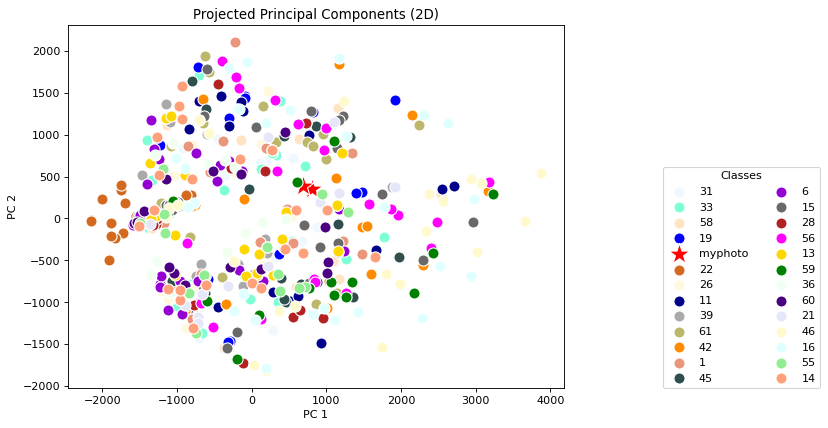

In [14]:
# 2D Plot
pca = PCA(n_components=2)
pca.fit(X)
X_transformed = pca.transform(X)
scatter_plot_2D(X_transformed, Y, title='Projected Principal Components (2D)',x_ax='PC 1',y_ax='PC 2',z_ax='PC 3')

In [15]:
# 3D Plot
pca = PCA(n_components=3)
pca.fit(X)
X_transformed = pca.transform(X)

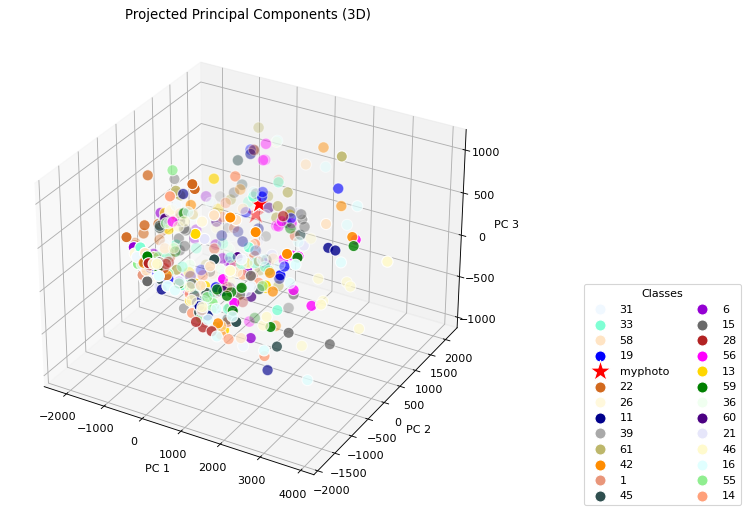

In [16]:
scatter_plot_3D(X_transformed, Y, title='Projected Principal Components (3D)',x_ax='PC 1',y_ax='PC 2',z_ax='PC 3')

The three eigenfaces are shown below:


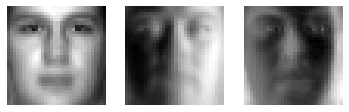

In [17]:
#In additon, 3 eigenfaces of this 3D PCA model are shown below
eigenfaces = pca.components_.reshape(3, 32, 32)
fig, axs= plt.subplots(1, 3)
for i in range(3):
    axs[i].imshow(eigenfaces[i, :, :], cmap='gray')
    axs[i].axis('off')
print('The three eigenfaces are shown below:')
plt.show()

<p> Till here, PCA is already applied to reduce the dimensionality of face images. Then to apply PCA to reduce the dimensionality of face images to 40, 80 and 200 respectively. To the test images using the rule of nearest neighbour.  

In [18]:
#prepare the test set for comparison, and those images need to be vectorized
# make them transfer to array
PIE_test_x=np.array(PIE_test_set) 
PIE_test_y=np.array(PIE_test_label) 
my_test_x=np.array(my_test_img)
my_test_y=np.array(my_test_label)  

# vectorized
PIE_test_x=PIE_test_x.reshape(len(test_img), -1) 
my_test_x = my_test_x.reshape(len(my_test_img), -1)

In [19]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

# to define a general KNN classifiers for different dimensionality of data use.
def PCA_KNN_classifiers(para,train_x,train_y,test_x,test_y,dataset='dataset'):
    pca=PCA(para)
    clf = KNeighborsClassifier(3)  # right here i will chose k=3.
    # Training
    pca.fit(train_x)
    train_x_reduced = pca.transform(train_x)
    clf.fit(train_x_reduced, train_y)
    
    # Testing 
    test_x_reduced = pca.transform(test_x)
    predictions = clf.predict(test_x_reduced)
    score = accuracy_score(test_y, predictions)
    print("The accuracy on {} for PCA {} is: {}%".format(dataset,para,round(score*100,5)))

**To analysis the accuracy for KNN classifiers with various PCA parameter**

**The next three blocks are for 3NN classifer conducted on 500 samples data.** 

In [20]:
PCA_KNN_classifiers(40,X,Y,test_x,test_y,'Total test set')
PCA_KNN_classifiers(40,X,Y,PIE_test_x,PIE_test_y,'PIE test set')
PCA_KNN_classifiers(40,X,Y,my_test_x,my_test_y,'My photo test set')

The accuracy on Total test set for PCA 40 is: 37.40219%
The accuracy on PIE test set for PCA 40 is: 37.32394%
The accuracy on My photo test set for PCA 40 is: 100.0%


In [21]:
PCA_KNN_classifiers(80,X,Y,test_x,test_y,'Total test set')
PCA_KNN_classifiers(80,X,Y,PIE_test_x,PIE_test_y,'PIE test set')
PCA_KNN_classifiers(80,X,Y,my_test_x,my_test_y,'My photo test set')

The accuracy on Total test set for PCA 80 is: 39.12363%
The accuracy on PIE test set for PCA 80 is: 38.88889%
The accuracy on My photo test set for PCA 80 is: 100.0%


In [22]:
PCA_KNN_classifiers(200,X,Y,test_x,test_y,'Total test set')
PCA_KNN_classifiers(200,X,Y,PIE_test_x,PIE_test_y,'PIE test set')
PCA_KNN_classifiers(200,X,Y,my_test_x,my_test_y,'My photo test set')

The accuracy on Total test set for PCA 200 is: 41.00156%
The accuracy on PIE test set for PCA 200 is: 41.00156%
The accuracy on My photo test set for PCA 200 is: 100.0%


<h4 align='center'>Table 1. Accuracy on three kinds of dataset for three different classifiers trained by 500 sample dataset.

Model|Accuracy for whole dataset|Accuracy for PIE dataset|Accuracy for own photo dataset
:----:|:----:|:----:|:----:
PCA 40|	37.40219%|	37.32394%|	100%
PCA 80|	39.12363%|	39.12363%|	100%
PCA 200| 41.00156%| 41.00156%| 100%

**The next three blocks are for 3NN classifer conducted on Whole dataset.**

In [23]:
PCA_KNN_classifiers(40,train_x,train_y,test_x,test_y,'Total test set')
PCA_KNN_classifiers(40,train_x,train_y,PIE_test_x,PIE_test_y,'PIE test set')
PCA_KNN_classifiers(40,train_x,train_y,my_test_x,my_test_y,'My photo test set')

The accuracy on Total test set for PCA 40 is: 86.61972%
The accuracy on PIE test set for PCA 40 is: 86.77621%
The accuracy on My photo test set for PCA 40 is: 100.0%


In [24]:
PCA_KNN_classifiers(80,train_x,train_y,test_x,test_y,'Total test set') 
PCA_KNN_classifiers(80,train_x,train_y,PIE_test_x,PIE_test_y,'PIE test set') 
PCA_KNN_classifiers(80,train_x,train_y,my_test_x,my_test_y,'My photo test set')

The accuracy on Total test set for PCA 80 is: 90.61033%
The accuracy on PIE test set for PCA 80 is: 90.37559%
The accuracy on My photo test set for PCA 80 is: 100.0%


In [25]:
PCA_KNN_classifiers(200,train_x,train_y,test_x,test_y,'Total test set') 
PCA_KNN_classifiers(200,train_x,train_y,PIE_test_x,PIE_test_y,'PIE test set') 
PCA_KNN_classifiers(200,train_x,train_y,my_test_x,my_test_y,'My photo test set')

The accuracy on Total test set for PCA 200 is: 91.78404%
The accuracy on PIE test set for PCA 200 is: 91.86228%
The accuracy on My photo test set for PCA 200 is: 100.0%


<h4 align='center'>Table 2. Accuracy on three kinds of dataset for three different classifiers trained by Whole training data.

Model|Accuracy for whole dataset|Accuracy for PIE dataset|Accuracy for own photo dataset
:----:|:----:|:----:|:----:
PCA 40|	86.61972%|	86.77621%|	100%
PCA 80|	 90.61033%|	90.37559%|	100%
PCA 200| 91.78404%| 91.86228%| 100%

<p>As shown in table.1 with the number of principle components increase from 40 to 200, the accuray for test on pure PIE dataset and whole data set is increasing. And luckily, the accuray for test on my self photos is remaining in 100%</p>


<h2> 1.3 Section of LDA </h2>
<p> Linear Discriminant Analysis (LDA) is used as a tool for classification, dimension reduction, and data visualization. It has been around for quite some time now. Despite its simplicity, LDA often produces robust, decent, and interpretable classification results.
<p> Like section of PCA,i will visualize distribution of the sampled data (as in the PCA section) with dimensionality of 2 and 3 respectively (similarto PCA). Report the classification accuracy for data with dimensions of 2, 3 and 9 respectively, based on nearest neighbour classifier.

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = train_x[selection, :] 
Y = train_y[selection]

# Plot 2D
LDA = LinearDiscriminantAnalysis(n_components=2)
LDA.fit(X,Y)
X_transformed_1 = LDA.transform(X)

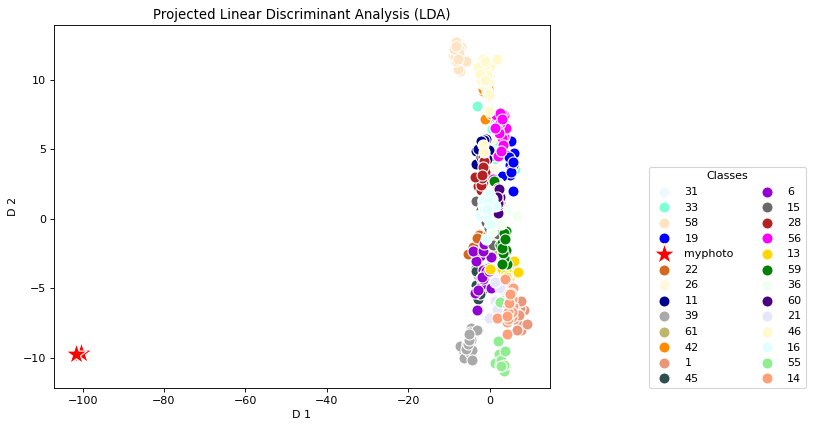

In [38]:
scatter_plot_2D(X_transformed_1, Y, title='Projected Linear Discriminant Analysis (LDA)',x_ax='D 1',y_ax='D 2')

In [39]:
# 3D Plot
LDA = LinearDiscriminantAnalysis(n_components=3)
LDA.fit(X, Y)
X_transformed_2 = LDA.transform(X)

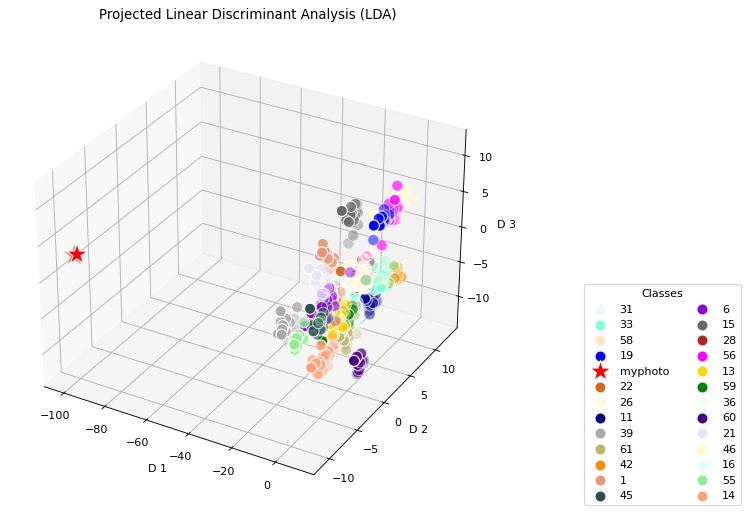

In [40]:
scatter_plot_3D(X_transformed_2, Y, title='Projected Linear Discriminant Analysis (LDA)',x_ax='D 1',y_ax='D 2',z_ax='D 3')

In [30]:
def LDA_KNN_classifiers(num,train_x,train_y,test_x,test_y,dataset='dataset'):
    lda = LinearDiscriminantAnalysis(n_components=num) 
    clf = KNeighborsClassifier(3)  # right here i will chose k as 3 for demo.
#It is common to select k small and odd to break ties (typically 1, 3 or 5). 
#Larger k values help reduce the effects of noisy points within the training data set,
    
    # Training proess
    lda.fit(train_x, train_y)
    train_x_reduced = lda.transform(train_x)
    clf.fit(train_x_reduced, train_y)
    
    # Testing process
    test_x_reduced = lda.transform(test_x)
    predictions = clf.predict(test_x_reduced)
    score = accuracy_score(test_y, predictions)
    print("The accuracy on {} for LDA {} is: {}%".format(dataset,num,round(score*100,5)))

Next, i will analyze how the output dimension of LDA affects the classfication accuracy.Nearset neighbors classfier in previous part and set the output dimension of LDAs to be 2, 3 and 9.


**The next three blocks are for 3NN classifer conducted on 500 samples data.**

In [31]:
LDA_KNN_classifiers(2,X,Y,test_x,test_y,'Total test set')
LDA_KNN_classifiers(2,X,Y,PIE_test_x,PIE_test_y,'PIE test set')
LDA_KNN_classifiers(2,X,Y,my_test_x,my_test_y,'My photo test set')

The accuracy on Total test set for LDA 2 is: 19.71831%
The accuracy on PIE test set for LDA 2 is: 19.71831%
The accuracy on My photo test set for LDA 2 is: 100.0%


In [35]:
LDA_KNN_classifiers(3,X,Y,test_x,test_y,'Total test set')
LDA_KNN_classifiers(3,X,Y,PIE_test_x,PIE_test_y,'PIE test set')
LDA_KNN_classifiers(3,X,Y,my_test_x,my_test_y,'My photo test set')

The accuracy on Total test set for LDA 3 is: 34.19405%
The accuracy on PIE test set for LDA 3 is: 34.19405%
The accuracy on My photo test set for LDA 3 is: 100.0%


In [36]:
LDA_KNN_classifiers(9,X,Y,test_x,test_y,'Total test set')
LDA_KNN_classifiers(9,X,Y,PIE_test_x,PIE_test_y,'PIE test set')
LDA_KNN_classifiers(9,X,Y,my_test_x,my_test_y,'My photo test set')

The accuracy on Total test set for LDA 9 is: 69.09233%
The accuracy on PIE test set for LDA 9 is: 69.09233%
The accuracy on My photo test set for LDA 9 is: 100.0%


<h4 align='center'>Table 3. Accuracy on three kind of data set for three different classifiers trained by 500 sample dataset.

Model|Accuracy for whole dataset|Accuracy for PIE dataset|Accuracy for own photo dataset
:----:|:----:|:----:|:----:
LDA 2|	19.71831%|	19.71831%|	100%
LDA 3|	34.19405%|	34.19405%|	100%
LDA 9|	69.09233%|	69.09233%|	100%

**The next three blocks are for 3NN classifer conducted on whole dataset.**

In [32]:
LDA_KNN_classifiers(2,train_x,train_y,test_x,test_y,'Total test set')
LDA_KNN_classifiers(2,train_x,train_y,PIE_test_x,PIE_test_y,'PIE test set')
LDA_KNN_classifiers(2,train_x,train_y,my_test_x,my_test_y,'My photo test set')

The accuracy on Total test set for LDA 2 is: 29.89045%
The accuracy on PIE test set for LDA 2 is: 29.89045%
The accuracy on My photo test set for LDA 2 is: 33.33333%


In [33]:
LDA_KNN_classifiers(3,train_x,train_y,test_x,test_y,'Total test set') 
LDA_KNN_classifiers(3,train_x,train_y,PIE_test_x,PIE_test_y,'PIE test set') 
LDA_KNN_classifiers(3,train_x,train_y,my_test_x,my_test_y,'My photo test set')

The accuracy on Total test set for LDA 3 is: 47.1831%
The accuracy on PIE test set for LDA 3 is: 47.1831%
The accuracy on My photo test set for LDA 3 is: 33.33333%


In [34]:
LDA_KNN_classifiers(9,train_x,train_y,test_x,test_y,'Total test set') 
LDA_KNN_classifiers(9,train_x,train_y,PIE_test_x,PIE_test_y,'PIE test set') 
LDA_KNN_classifiers(9,train_x,train_y,my_test_x,my_test_y,'My photo test set')

The accuracy on Total test set for LDA 9 is: 88.96714%
The accuracy on PIE test set for LDA 9 is: 88.96714%
The accuracy on My photo test set for LDA 9 is: 33.33333%


<h4 align='center'>Table 4. Accuracy on three kind of data set for three different classifiers trained by whole dataset.

Model|Accuracy for whole dataset|Accuracy for PIE dataset|Accuracy for own photo dataset
:----:|:----:|:----:|:----:
LDA 2|	29.89045%|	29.89045%|	33.33333%
LDA 3|	47.1831%|	47.1831%|	33.33333%
LDA 9|	88.96714%|	88.96714%|	33.3333%

<p> As shown in table.2 with the dimension increase from 2 to 9, the accuray for test on pure PIE dataset and whole data set is increasing. And luckily, the accuray for test on my self photos is remaining in 100%.During demension reduction process, Some of original information will certainly be lost. However,LDA with higher output dimension suggests less information loss and will conduct a better classification performances.</p>